# Data Source and Loading 

Source :https://data.worldbank.org/indicator/en.atm.co2e.pc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
df_c=pd.read_csv("data.csv",skiprows=3)
df_c.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------------
# Data- Cleaning / Manipulation / Transforamtion

We want to perform time series analysis hence we need to transform data to use datetime aspect of the data

**1. Dropna() dropping na values for missing years**

**2. Data formatting**

**3. Data Normalization**

**4. No need of binning**

**5. No Categorical Variable**

### Creating a drop down menu for performing analysis on required appropriate country

In [2]:
drop_down_menu = widgets.Dropdown(
    options=sorted(list(df_c['Country Name'])),
    value='World',
    description='Country:',
    disabled=False,
)

drop_down_menu

Dropdown(description='Country:', index=260, options=('Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'A…

In [16]:
from sklearn import preprocessing
chosen_country = drop_down_menu.value
# Data formatting
def populate_df(row):
    index = str(row['date'].year)
    value = df_c_world.loc[index]
    return value
  
df_c_world = df_c[df_c['Country Name']==chosen_country].loc[:,'1960':'2019']
df_c_world = df_c_world.T
df_c_world.columns = ['value']
date_rng = pd.date_range(start='01/01/1960', end='01/01/2019', freq='y')
emission = pd.DataFrame(date_rng, columns=['date'])
v = emission.apply(lambda row: populate_df(row), axis=1)
emission['Global CO2 Emissions per Capita of '+chosen_country] = v
emission.set_index('date', inplace=True)
#Removing NA values
emission.dropna(inplace=True)
#Normalizing Data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(emission)
emission[emission.columns[0]]=np_scaled
emission.head()

,Global CO2 Emissions per Capita of World
date,
1960-12-31,0.015059
1961-12-31,0.000000
1962-12-31,0.036660
1963-12-31,0.090484
1964-12-31,0.150571


# Exploratory Data Analysis

### Descriptive Statistics

In [17]:
emission.describe()

,Global CO2 Emissions per Capita of World
count,55.000000
mean,0.548751
std,0.237553
min,0.000000
25%,0.487214
50%,0.542982
75%,0.651871
max,1.000000


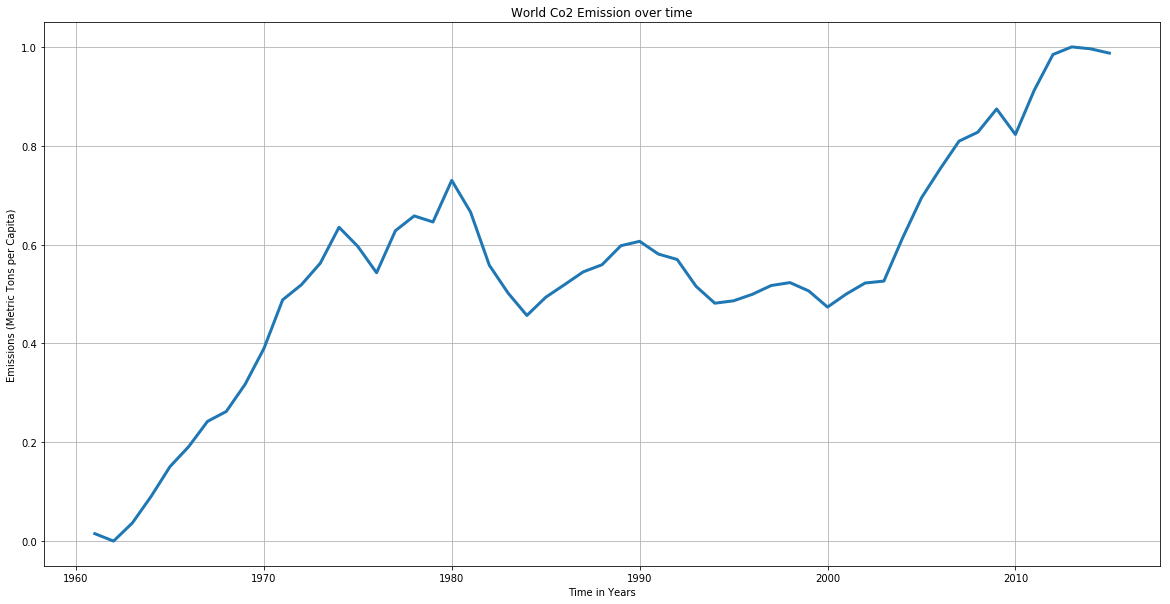

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(emission,linewidth=3.0)
plt.grid()
plt.xlabel("Time in Years")
plt.ylabel("Emissions (Metric Tons per Capita)")
plt.title(chosen_country+" Co2 Emission over time")
plt.show()

In [20]:
#!pip3 install cufflinks
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [21]:
emission.iplot(kind='line', xTitle='Time (years)', color='#3393FF',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')

# Calculate first difference

Seasonal Patterns in Time Series Data
One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

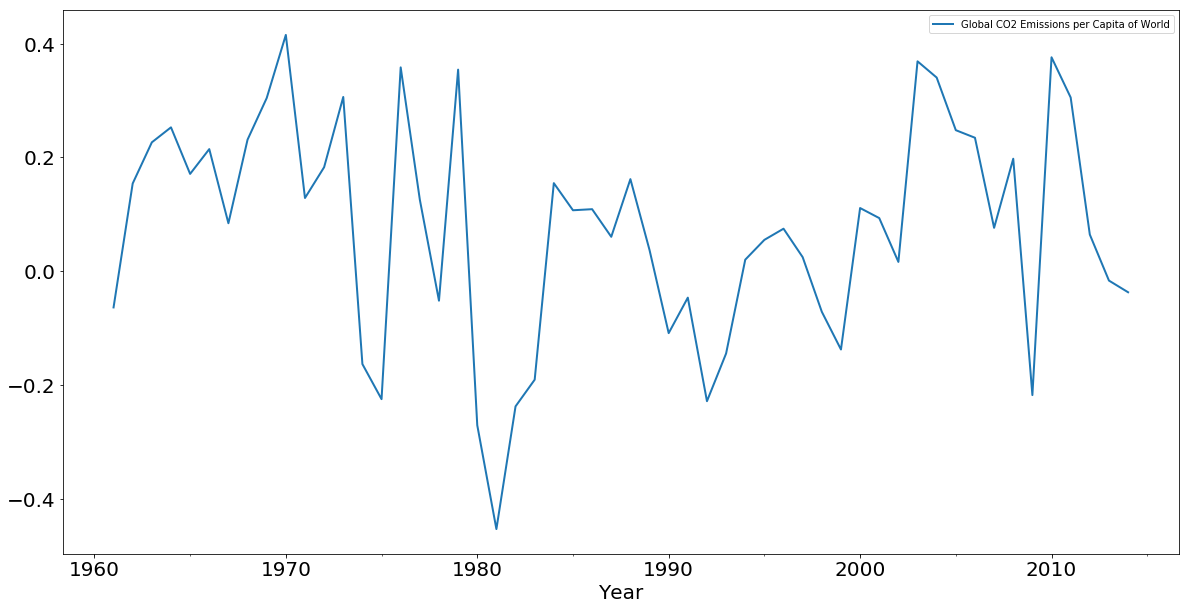

In [8]:
emission.diff().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

Normalized Cross-Correlation in Python

a = (a - np.mean(a)) / (np.std(a) * len(a))

b = (b - np.mean(b)) / (np.std(b))

c = np.correlate(a, b, 'full')

Another approach is called link relatives. Link relatives are similar, but they divideeach point by the point that came before it:

In [23]:
emission.to_csv("clean_co2.csv")

In [24]:
#emission

,Global CO2 Emissions per Capita of World
date,
1960-12-31,0.015059
1961-12-31,0.000000
1962-12-31,0.036660
1963-12-31,0.090484
1964-12-31,0.150571
1965-12-31,0.191228
1966-12-31,0.242232
1967-12-31,0.262299
1968-12-31,0.317243
